## Instal packages

In [ ]:
!apt-get install tree

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  tree
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 47.9 kB of archives.
After this operation, 116 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tree amd64 2.0.2-1 [47.9 kB]
Fetched 47.9 kB in 1s (46.2 kB/s)
Selecting previously unselected package tree.
(Reading database ... 121918 files and directories currently installed.)
Preparing to unpack .../tree_2.0.2-1_amd64.deb ...
Unpacking tree (2.0.2-1) ...
Setting up tree (2.0.2-1) ...
Processing triggers for man-db (2.10.2-1) ...


In [ ]:
! mkdir ~/.kaggle/

In [ ]:
! cp '/content/drive/MyDrive/kaggle/kaggle.json' ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                            title                                           size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------------------------------  ---------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
rahulvyasm/netflix-movies-and-tv-shows                         Netflix Movies and TV Shows                      1MB  2024-04-10 09:48:38          21763        477  1.0              
jainaru/world-happiness-report-2024-yearly-updated             World Happiness Report- 2024                    62KB  2024-05-15 19:04:34           1902         36  1.0              
sahirmaharajj/school-student-daily-attendance                  School Student Daily Attendance                  2MB  2024-04-29 19:29:56           5768        118  1.0              
jainaru/thyroid-disease-data                                   Thyroid Disease Data       

In [ ]:
#https://www.kaggle.com/datasets/sttaseen/wlasl2000-resized

In [ ]:
! kaggle datasets download -d sttaseen/wlasl2000-resized

Dataset URL: https://www.kaggle.com/datasets/sttaseen/wlasl2000-resized
License(s): other
100% 1.87G/1.87G [00:30<00:00, 76.5MB/s]
100% 1.87G/1.87G [00:30<00:00, 65.1MB/s]


# Packages: Import

## Import

In [2]:
!pip install -q mediapipe kaggle

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.7/35.7 MB 42.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 22.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-metadata 1.15.0 requires protobuf<4.21,>=3.20.3; python_version < "3.11", but you have protobuf 4.25.3 which is incompatible.


In [3]:
import tensorflow as tf
import zipfile
import cv2
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mediapipe as mp
import json, os
import os, shutil
import glob
import h5py

In [4]:
from tensorflow.keras.layers import LSTM, Masking, Dense
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [7]:
print(tf.__version__)

2.15.0


In [5]:
workdir = "/content/drive/MyDrive/Tensorflow dev/real_time_sign_language"
os.chdir(workdir)

In [6]:
ls

 0.npy                                                          'ViT SegFormer.ipynb'
 output_video.mp4                                                wlasl2000-resized.zip
 real_time_sign_language_to_text.ipynb                           wlasl-complete/
'Real_time_signlanguage_to_text LSTM& CNN.ipynb'                 WLASL_v0.3.json
 sign_model.h5                                                   WLASL_v0.3.json.zip
 video_data/                                                     word_classes.txt
'Visual Transformers Real Time SIgn language Translator.ipynb'


# Load and create the dataset folder

In [ ]:
zip = zipfile.ZipFile("WLASL_v0.3.json.zip")
zip.extractall()
zip.close()

In [ ]:
zip = zipfile.ZipFile("wlasl2000-resized.zip")
zip.extractall()
zip.close()

In [8]:


with open("WLASL_v0.3.json", "r") as f:
  json_data = json.load(f)
print(json_data)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
!tree  wlasl-complete/

wlasl-complete/
├── find_missing.py
├── missing.txt
├── nslt_1000.json
├── nslt_100.json
├── nslt_2000.json
├── nslt_300.json
^C


In [9]:
sign_video_data_dir ="video_data"
train_dir =os.path.join(sign_video_data_dir, "train")
val_dir =os.path.join(sign_video_data_dir, "val")
test_dir = os.path.join(sign_video_data_dir, "test")


In [32]:
with open(os.path.join(workdir, "word_classes.txt")) as f:
  liste = f.readlines()
  liste = [i.split("\t")[-1].split("\n")[0] for i in liste]
  print(liste)

['book', 'drink', 'computer', 'before', 'chair', 'go', 'clothes', 'who', 'candy', 'cousin', 'deaf', 'fine', 'help', 'no', 'thin', 'walk', 'year', 'yes', 'all', 'black', 'cool', 'finish', 'hot', 'like', 'many', 'mother', 'now', 'orange', 'table', 'thanksgiving', 'what', 'woman', 'bed', 'blue', 'bowling', 'can', 'dog', 'family', 'fish', 'graduate', 'hat', 'hearing', 'kiss', 'language', 'later', 'man', 'shirt', 'study', 'tall', 'white', 'wrong', 'accident', 'apple', 'bird', 'change', 'color', 'corn', 'cow', 'dance', 'dark', 'doctor', 'eat', 'enjoy', 'forget', 'give', 'last', 'meet', 'pink', 'pizza', 'play', 'school', 'secretary', 'short', 'time', 'want', 'work', 'africa', 'basketball', 'birthday', 'brown', 'but', 'cheat', 'city', 'cook', 'decide', 'full', 'how', 'jacket', 'letter', 'medicine', 'need', 'paint', 'paper', 'pull', 'purple', 'right', 'same', 'son', 'tell', 'thursday', 'visit', 'wait', 'water', 'wife', 'yellow', 'backpack', 'bar', 'brother', 'cat', 'check', 'class', 'cry', 'dif

In [10]:
for data in json_data[:10]:
  #print(i.keys())
  for instances in data["instances"]:
    #print(instances['split'], instances['url'], data['gloss'])# instances['video_id'] )#['fps'])
    #print(path)
    path = os.path.join(sign_video_data_dir, f"{instances['split']}/{data['gloss']}")
    print(instances)
    break

  break

{'bbox': [385, 37, 885, 720], 'fps': 25, 'frame_end': -1, 'frame_start': 1, 'instance_id': 0, 'signer_id': 118, 'source': 'aslbrick', 'split': 'train', 'url': 'http://aslbricks.org/New/ASL-Videos/book.mp4', 'variation_id': 0, 'video_id': '69241'}


In [ ]:
if not os.path.exists(sign_video_data_dir):
  os.mkdir(sign_video_data_dir)
  os.mkdir(train_dir)
  os.mkdir(val_dir)
  os.mkdir(test_dir)

### split videos

In [ ]:
import shutil
for data in json_data:
  for instances in data["instances"]:
    #print(instances['split'], instances['url'], data['gloss'])# instances['video_id'] )#['fps'])
    path = os.path.join(sign_video_data_dir, f"{instances['split']}/{data['gloss']}")
    video_path = f"/content/drive/MyDrive/Tensorflow dev/real_time_sign_language/wasl_data/wlasl-complete/videos/{instances['video_id']}.mp4"
    try:
      shutil.move(video_path, os.path.join(path, f"{instances['video_id']}.mp4"))
      #print("success")
    except:
      pass
      #print(video_path, os.path.join(path, f"{instances['video_id']}.mp4"))


# Dataset to Landmarks

In [33]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [12]:
def preprocess(array):
  mean = np.mean(array)
  std = np.std(array)
  return (array-mean)/std

In [19]:
mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_styles

def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections


def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             )
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             )
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             )
    # Draw right hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             )

In [40]:


holistic=mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5)

# Exemple de fonction pour traiter une vidéo
def process_video(video_path):
    cap = cv2.VideoCapture(video_path)
    all = []

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        # Convertir l'image BGR en RGB
        #frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        # Processer l'image avec MediaPipe Holistic
        #results = holistic.process(frame_rgb)
        frame, results = mediapipe_detection(frame, holistic)
        #draw_styled_landmarks(frame, results)
        pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
        face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
        lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
        rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

        out = np.concatenate([pose, face, lh, rh])
        all.append(np.array(out))
        #cv2_imshow(frame)


    cap.release()
    #holistic.close()
    padding = 100
    all = all[:padding] if len(all) > padding else all+list(np.zeros((padding-len(all), len(all[0]))))
    all= np.array(all)

    #Preprocessing
    all = preprocess(all)
    return all



In [27]:
#Test:
video_path = "video_data/train/a/01610.mp4"
out = process_video(video_path)
out.shape

(100, 1662)

In [30]:
X_train, y_train = [], []
X_test, y_test = [], []
X_val, y_val = [], []

In [34]:
def process_videos(video_paths, label):
    X, y = [], []
    for video_path in video_paths:
        try:
            X.append(process_video(video_path))
            y.append(label)
        except Exception as e:
            print(e)
    return X, y

print(train_dir)



for classes in liste[:9]:
    train_videos = glob.glob(os.path.join(train_dir, classes, "*.mp4"))
    test_videos = glob.glob(os.path.join(test_dir, classes, "*.mp4"))
    val_videos = glob.glob(os.path.join(val_dir, classes, "*.mp4"))

    X_t, y_t = process_videos(train_videos, classes)
    X_train.extend(X_t)
    y_train.extend(y_t)

    X_t, y_t = process_videos(test_videos, classes)
    X_test.extend(X_t)
    y_test.extend(y_t)

    X_t, y_t = process_videos(val_videos, classes)
    X_val.extend(X_t)
    y_val.extend(y_t)

X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)
X_val, y_val = np.array(X_val), np.array(y_val)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape, X_val.shape, y_val.shape)


video_data/train
(184, 100, 1662) (184,) (32, 100, 1662) (32,) (41, 100, 1662) (41,)


In [35]:
holistic.close()

In [ ]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape, X_val.shape, y_val.shape)

(75, 155, 1662) (75,) (13, 155, 1662) (13,) (17, 155, 1662) (17,)


In [36]:

def encoder_label(label):
  encode = LabelEncoder()
  one_hot = OneHotEncoder(sparse=False)
  new_label= encode.fit_transform(label)
  outlabel= one_hot.fit_transform(new_label.reshape(len(new_label), 1))
  return outlabel



In [37]:
y_train, y_test, y_val = encoder_label(y_train), encoder_label(y_test), encoder_label(y_val)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [38]:
print(y_train)

[[0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]


In [41]:
# Utilisation de la fonction avec un chemin de vidéo
video_path = "video_data/train/before/05734.mp4"
out = process_video(video_path)

print(f"out shape: {out.shape}")  # Devrait afficher (30, 542) pour une vidéo de 30 frames


/usr/local/lib/python3.10/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


out shape: (100, 1662)


# Visualisation

In [ ]:
mp_drawing = mp.solutions.drawing_utils
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION,
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             )
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             )
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             )
    # Draw right hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             )

In [ ]:
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# Initialiser MediaPipe
mp_hands = mp.solutions.hands

# Initialiser la capture vidéo (0 pour la webcam intégrée ou chemin de la vidéo)
cap = cv2.VideoCapture(video_path)

# Utiliser MediaPipe Hands
with mp_hands.Hands(
    static_image_mode=False,
    max_num_hands=2,
    min_detection_confidence=0.5) as hands:

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        # Convertir l'image en RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        # Détecter les landmarks des mains
        results = hands.process(image)

        # Vérifier si des landmarks sont détectés
        if results.multi_hand_landmarks:
            for hand_landmarks in results.multi_hand_landmarks:
                # Extraire les coordonnées des landmarks
                landmarks = [(lm.x, lm.y, lm.z) for lm in hand_landmarks.landmark]

                # Afficher les landmarks dans un graphe 3D
                fig = plt.figure(figsize=(10, 10))
                ax = fig.add_subplot(111, projection='3d')

                x_vals = [lm[0] for lm in landmarks]
                y_vals = [lm[1] for lm in landmarks]
                z_vals = [lm[2] for lm in landmarks]

                ax.scatter(x_vals, y_vals, z_vals)

                ax.set_xlabel('X')
                ax.set_ylabel('Y')
                ax.set_zlabel('Z')

                plt.title('Landmarks des mains en 3D')
                plt.show()
                break  # Afficher seulement les landmarks de la première main détectée et quitter la boucle

        if cv2.waitKey(5) & 0xFF == 27:
            break

cap.release()
cv2.destroyAllWindows()


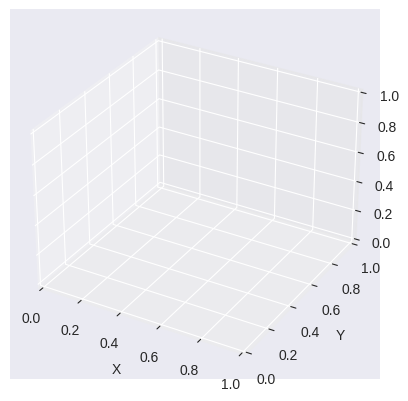

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.animation as animation

# Fixing random state for reproducibility
np.random.seed(19680801)


def random_walk(num_steps, max_step=0.05):
    """Return a 3D random walk as (num_steps, 3) array."""
    start_pos = np.random.random(3)
    steps = np.random.uniform(-max_step, max_step, size=(num_steps, 3))
    walk = start_pos + np.cumsum(steps, axis=0)
    return walk


def update_lines(num, walks, lines):
    for line, walk in zip(lines, walks):
        line.set_data_3d(walk[:num, :].T)
    return lines


# Data: 40 random walks as (num_steps, 3) arrays
num_steps = 30
walks = [random_walk(num_steps) for index in range(40)]

# Attaching 3D axis to the figure
fig = plt.figure()
ax = fig.add_subplot(projection="3d")

# Create lines initially without data
lines = [ax.plot([], [], [])[0] for _ in walks]

# Setting the Axes properties
ax.set(xlim3d=(0, 1), xlabel='X')
ax.set(ylim3d=(0, 1), ylabel='Y')
ax.set(zlim3d=(0, 1), zlabel='Z')

# Creating the Animation object
ani = animation.FuncAnimation(
    fig, update_lines, num_steps, fargs=(walks, lines), interval=100)

plt.show()

# Models

In [46]:
label = liste[:9]
label

['book',
 'drink',
 'computer',
 'before',
 'chair',
 'go',
 'clothes',
 'who',
 'candy']

In [47]:
model= Sequential([
    Masking(mask_value= 0.0, input_shape = X_train.shape[1:] ),
    LSTM(units = 64, return_sequences= True, activation="relu"),
    LSTM(units = 128, return_sequences= True, activation="relu"),
    LSTM(units = 64, return_sequences= False,activation="relu"),
    Dense(len(label), activation="softmax")
])

model.compile(optimizer=RMSprop(learning_rate=1e-4), loss="categorical_crossentropy", metrics=["accuracy"])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 masking_1 (Masking)         (None, 100, 1662)         0         
                                                                 
 lstm_3 (LSTM)               (None, 100, 64)           442112    
                                                                 
 lstm_4 (LSTM)               (None, 100, 128)          98816     
                                                                 
 lstm_5 (LSTM)               (None, 64)                49408     
                                                                 
 dense_1 (Dense)             (None, 9)                 585       
                                                                 
Total params: 590921 (2.25 MB)
Trainable params: 590921 (2.25 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [48]:
history = model.fit(X_train, y_train, batch_size=32, epochs= 100,  validation_data=(X_val, y_val))

Epoch 1/100
6/6 [==============================] - 10s 1s/step - loss: 1545.3621 - accuracy: 0.0870 - val_loss: 2347.9209 - val_accuracy: 0.0732
Epoch 2/100
6/6 [==============================] - 3s 555ms/step - loss: 2065.9849 - accuracy: 0.0870 - val_loss: 3878.1331 - val_accuracy: 0.0732
Epoch 3/100
6/6 [==============================] - 3s 565ms/step - loss: 3145.3406 - accuracy: 0.0924 - val_loss: 1926.0736 - val_accuracy: 0.0976
Epoch 4/100
6/6 [==============================] - 4s 745ms/step - loss: 3303.2180 - accuracy: 0.1087 - val_loss: 5323.3394 - val_accuracy: 0.0488
Epoch 5/100
6/6 [==============================] - 7s 1s/step - loss: 7547.0000 - accuracy: 0.0924 - val_loss: 6032.3076 - val_accuracy: 0.0732
Epoch 6/100
6/6 [==============================] - 3s 569ms/step - loss: 6729.4185 - accuracy: 0.1141 - val_loss: 5215.4648 - val_accuracy: 0.1463
Epoch 7/100
6/6 [==============================] - 5s 937ms/step - loss: 5294.2905 - accuracy: 0.1304 - val_loss: 6124.9766

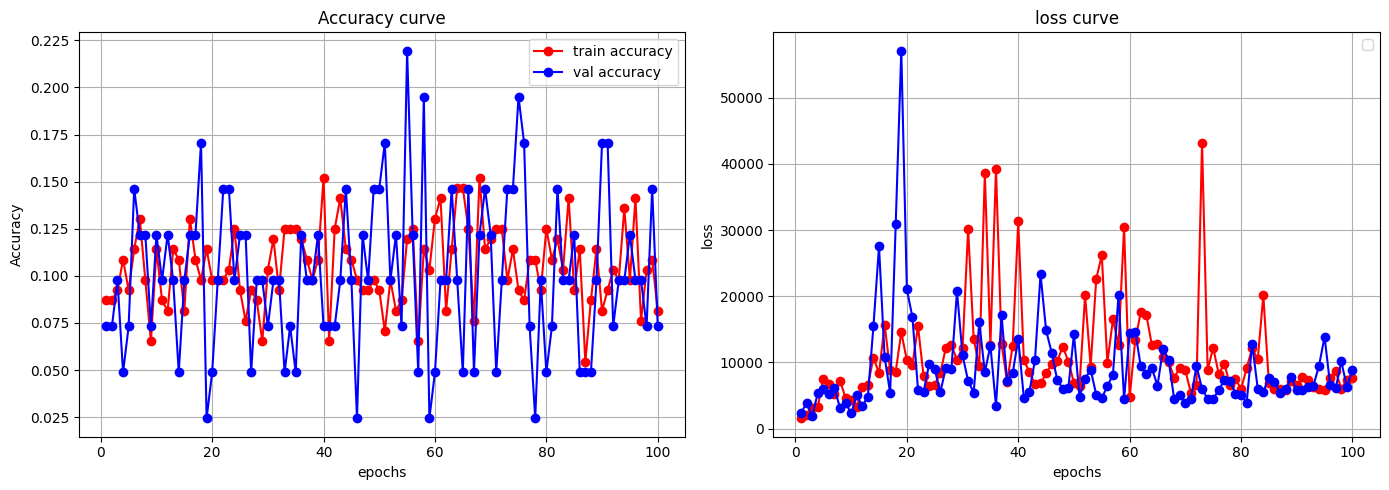

In [49]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, "ro-", label="train accuracy")
plt.plot(epochs, val_acc, "bo-", label="val accuracy")
plt.xlabel("epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy curve")
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, "ro-")
plt.plot(epochs, val_loss, "bo-")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("loss curve")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Prediction

In [50]:
model.predict(X_test)

1/1 [==============================] - 1s 516ms/step


array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.

In [51]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 87ms/step - loss: 4781.6587 - accuracy: 0.1250


[4781.65869140625, 0.125]

In [52]:
def pipeline(video_path):
  out= process_video(video_path)
  predict = model.predict(out.reshape(1, out.shape[0], out.shape[1]))
  predict = label[np.argmax(predict)]
  return predict

In [53]:
video_path = "video_data/val/computer/12335.mp4"
print(pipeline(video_path))

/usr/local/lib/python3.10/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


1/1 [==============================] - 1s 730ms/step
computer


In [54]:
model.save("sign_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
ls

 0.npy
 output_video.mp4
 real_time_sign_language_to_text.ipynb
'Real_time_signlanguage_to_text LSTM& CNN.ipynb'
 sign_model.h5
 video_data/
'Visual Transformers Real Time SIgn language Translator.ipynb'
 wlasl2000-resized.zip
 wlasl-complete/
 WLASL_v0.3.json
 WLASL_v0.3.json.zip
 word_classes.txt


In [ ]:
model_load = tf.keras.models.load_model("sign_model.h5")
model_load.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 masking (Masking)           (None, 155, 1662)         0         
                                                                 
 lstm (LSTM)                 (None, 155, 64)           442112    
                                                                 
 lstm_1 (LSTM)               (None, 155, 128)          98816     
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 3)                 195       
                                                                 
Total params: 590531 (2.25 MB)
Trainable params: 590531 (2.25 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Real Time Prediction